In [166]:
from conphar.Pharmacophores import parse_json_pharmacophore, show_pharmacophoric_descriptors, save_pharmacophore_to_pymol, save_pharmacophore_to_json, compute_concensus_pharmacophore, get_ligand_receptor_pharmacophore
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.environ["LC_ALL"] = "C"
os.environ["LANG"] = "C"

Next cell only works on Linux machines

In [ ]:
receptor_path = "../Data/target/AF-Q13705-ACVR2B_-_prepared.pdb"  # update with your actual receptor file

for file in os.listdir("../Data/other/SDF poses/"):
    if file.endswith(".sdf"):
        ligand_path = f"../Data/other/SDF poses/{file}"
        output_name = os.path.splitext(file)[0]
        out_path = f"../Results/pharmacophores/{output_name}"
        get_ligand_receptor_pharmacophore(receptor=receptor_path, ligand=ligand_path, out=out_path)

From here it works on all machines

In [167]:
cluster = 'cluster_2'

p4_table=pd.DataFrame()
for file in os.listdir(f'../Results/pharmacophores/{cluster}'):
    if '.json' in file:
        try:
            p4,lig,rec=parse_json_pharmacophore(f"../Results/pharmacophores/{cluster}/{file}")
            p4['ligand']=file.replace('.json','')
            p4_table=pd.concat([p4_table,p4],ignore_index=True)
        except Exception:
            pass

In [168]:
# rename colors
p4_table['color'] = p4_table['color'].replace({
    'navy': 'blue',
    'white': 'yellow',
})
p4_table = p4_table[~p4_table['name'].isin(['NegativeIon', 'PositiveIon'])]
p4_table

,enabled,name,radius,size,svector,vector,x,y,z,color,ligand
0,True,Aromatic,1.1,6,"{'x': 0.2970742844408327, 'y': -0.951079817978...","[{'x': 0.2970742844408327, 'y': -0.95107981797...",-1.3954,0.945467,-12.028183,purple,QWQ_7A21
1,True,Aromatic,1.1,6,"{'x': 0.3442435949426682, 'y': 0.8915390962183...","[{'x': 0.3442435949426682, 'y': 0.891539096218...",-9.0324,1.428400,-12.199350,purple,QWQ_7A21
2,True,HydrogenAcceptor,0.5,1,"{'x': -0.097164024138727, 'y': -0.885561019372...","[{'x': -0.097164024138727, 'y': -0.88556101937...",-5.3695,-1.717800,-13.602700,orange,QWQ_7A21
3,True,HydrogenAcceptor,0.5,1,"{'x': 0.7803243896148386, 'y': -0.002877354076...","[{'x': 0.7803243896148384, 'y': -0.00287735407...",-12.3372,1.887100,-11.105900,orange,QWQ_7A21
4,True,HydrogenAcceptor,0.5,1,"{'x': 0.9487684392991103, 'y': 0.2077488332775...","[{'x': 0.9487684392991103, 'y': 0.207748833277...",0.6015,1.416600,-13.982000,orange,QWQ_7A21
...,...,...,...,...,...,...,...,...,...,...,...
144,True,Hydrophobic,1.0,6,NaN,NaN,-9.1961,1.901917,-12.182183,green,U0C_8C7W
145,True,Hydrophobic,1.0,1,NaN,NaN,-0.0127,1.186000,-15.513200,green,U0C_8C7W
146,True,Hydrophobic,1.0,1,NaN,NaN,2.1022,0.830600,-11.068900,green,U0C_8C7W
147,True,Hydrophobic,1.0,1,NaN,NaN,-1.9322,1.826100,-8.531500,green,U0C_8C7W


In [169]:
# print sum of "Aromatic" in name column of p4_table
p4_table['name'].value_counts()

name
Hydrophobic         62
HydrogenAcceptor    55
Aromatic            22
HydrogenDonor       10
Name: count, dtype: int64

In [ ]:
os.makedirs(f'../Results/pharmacophores/{cluster}/consensus', exist_ok=True)
save_pharmacophore_to_pymol(p4_table,out_file=f'../Results/pharmacophores/{cluster}/consensus/all_features_{cluster}.pse')
save_pharmacophore_to_json(p4_table,out_file=f'../Results/pharmacophores/{cluster}/consensus/all_features_{cluster}.json')

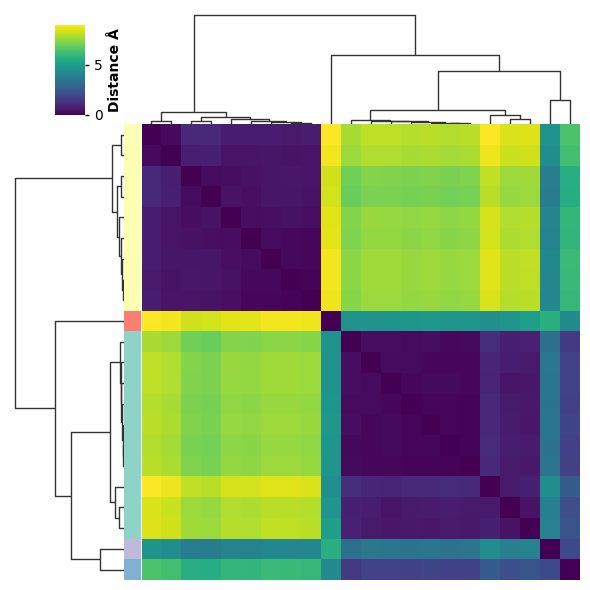

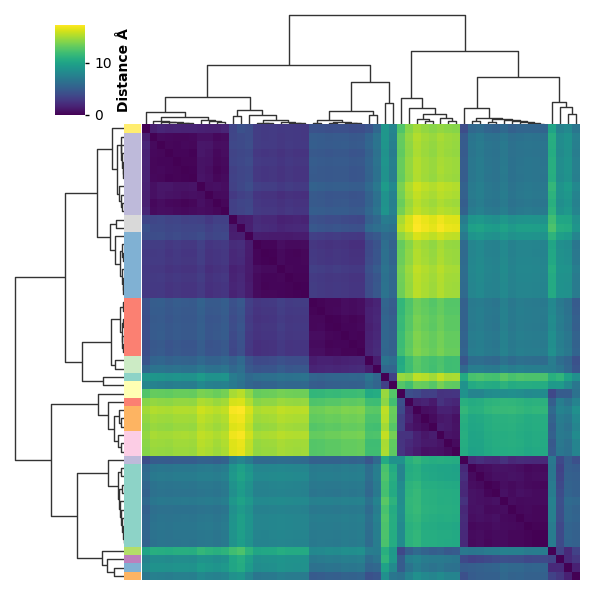

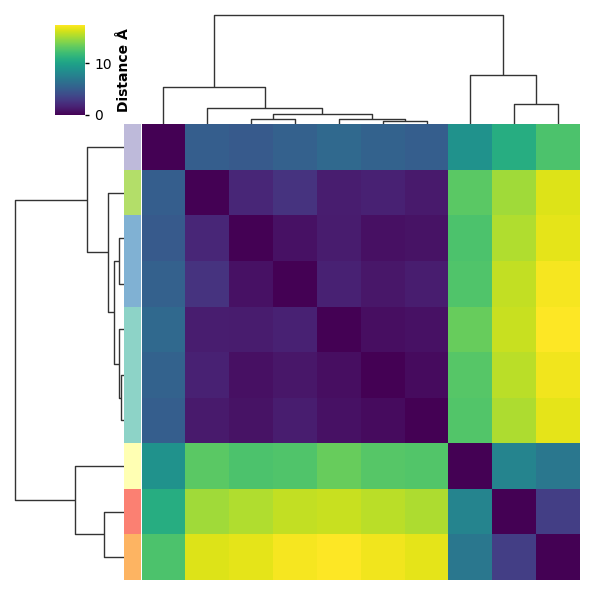

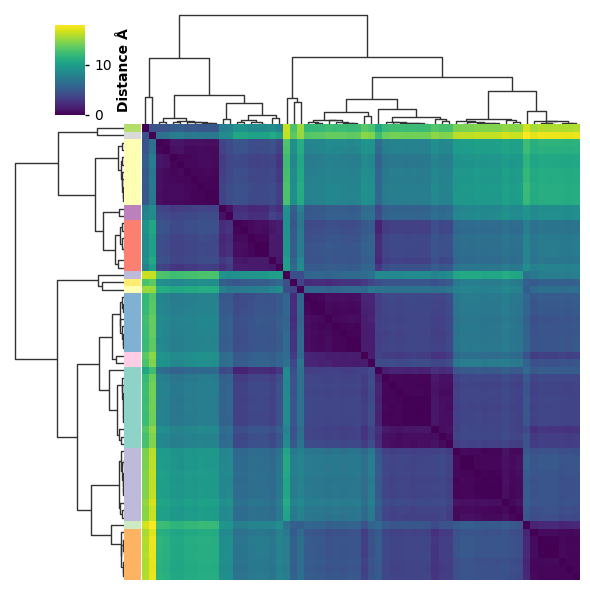

In [170]:
concensus,links=compute_concensus_pharmacophore(p4_table,save_data_per_descriptor=True,out_folder=f'../Results/pharmacophores/{cluster}/consensus',cmap_plots="viridis", h_dist=1.5,)

In [171]:
concensus['cluster'] = concensus['cluster'].astype(int)
concensus

,name,cluster,x,y,z,radius,color,weight,variance
1,Aromatic,1,-8.931787,1.623796,-12.175643,1.110976,purple,9.0,0.116694
2,Aromatic,2,-1.294587,0.959010,-12.081255,1.315628,purple,10.0,0.147706
3,Aromatic,3,-4.908100,1.006633,-11.954350,0.500000,purple,1.0,0.000000
4,Aromatic,4,-3.029000,1.471333,-11.617167,0.500000,purple,1.0,0.000000
5,Aromatic,5,-1.460500,4.074667,-8.658333,0.500000,purple,1.0,0.000000
6,HydrogenAcceptor,1,0.662990,1.298950,-14.044800,1.191748,orange,10.0,0.140658
7,HydrogenAcceptor,2,-0.149000,0.113000,-13.345000,0.500000,orange,1.0,0.000000
8,HydrogenAcceptor,3,2.851350,1.615250,-11.417200,1.157267,orange,2.0,0.431999
9,HydrogenAcceptor,4,1.196925,1.950700,-11.313975,1.602888,orange,8.0,0.213144
10,HydrogenAcceptor,5,-0.824057,1.581457,-9.492286,0.838706,orange,7.0,0.061182


In [ ]:
concensus.to_csv(f'../Results/pharmacophores/sub_models/consensus_weights_{cluster}.csv', index=False)

In [172]:
#remove all rows where weight < 2
concensus_test = concensus[concensus['weight'] >= 2]
len(concensus_test)

20

In [ ]:
save_pharmacophore_to_pymol(concensus,out_file=f'../Results/pharmacophores/{cluster}/consensus/{cluster}_concensus.pse',
select='concensus')
save_pharmacophore_to_json(concensus,out_file=f'../Results/pharmacophores/{cluster}/consensus/{cluster}_concensus.json')

manually make Weight dependant coloring

In [173]:
total_compounds = len(p4_table['ligand'].unique())
print(total_compounds)

weighting_list = concensus
weighting_list['frequency'] = weighting_list['weight'] / total_compounds


weighting_list

11


,name,cluster,x,y,z,radius,color,weight,variance,frequency
1,Aromatic,1,-8.931787,1.623796,-12.175643,1.110976,purple,9.0,0.116694,0.818182
2,Aromatic,2,-1.294587,0.959010,-12.081255,1.315628,purple,10.0,0.147706,0.909091
3,Aromatic,3,-4.908100,1.006633,-11.954350,0.500000,purple,1.0,0.000000,0.090909
4,Aromatic,4,-3.029000,1.471333,-11.617167,0.500000,purple,1.0,0.000000,0.090909
5,Aromatic,5,-1.460500,4.074667,-8.658333,0.500000,purple,1.0,0.000000,0.090909
6,HydrogenAcceptor,1,0.662990,1.298950,-14.044800,1.191748,orange,10.0,0.140658,0.909091
7,HydrogenAcceptor,2,-0.149000,0.113000,-13.345000,0.500000,orange,1.0,0.000000,0.090909
8,HydrogenAcceptor,3,2.851350,1.615250,-11.417200,1.157267,orange,2.0,0.431999,0.181818
9,HydrogenAcceptor,4,1.196925,1.950700,-11.313975,1.602888,orange,8.0,0.213144,0.727273
10,HydrogenAcceptor,5,-0.824057,1.581457,-9.492286,0.838706,orange,7.0,0.061182,0.636364


In [174]:
# print the top 4 best clusters based on normalized_frequency for each name
top_indices = weighting_list.groupby('name')['frequency'].nlargest(4).reset_index(level=0, drop=True).index
top_clusters = weighting_list.loc[top_indices]
top_clusters = top_clusters.sort_values(by='name')
top_clusters

,name,cluster,x,y,z,radius,color,weight,variance,frequency
2,Aromatic,2,-1.294587,0.959010,-12.081255,1.315628,purple,10.0,0.147706,0.909091
1,Aromatic,1,-8.931787,1.623796,-12.175643,1.110976,purple,9.0,0.116694,0.818182
3,Aromatic,3,-4.908100,1.006633,-11.954350,0.500000,purple,1.0,0.000000,0.090909
4,Aromatic,4,-3.029000,1.471333,-11.617167,0.500000,purple,1.0,0.000000,0.090909
6,HydrogenAcceptor,1,0.662990,1.298950,-14.044800,1.191748,orange,10.0,0.140658,0.909091
18,HydrogenAcceptor,13,-5.444880,-1.650850,-13.863250,1.011162,orange,10.0,0.132626,0.909091
9,HydrogenAcceptor,4,1.196925,1.950700,-11.313975,1.602888,orange,8.0,0.213144,0.727273
10,HydrogenAcceptor,5,-0.824057,1.581457,-9.492286,0.838706,orange,7.0,0.061182,0.636364
25,HydrogenDonor,2,-13.601467,5.085100,-11.184400,0.941226,yellow,3.0,0.139979,0.272727
24,HydrogenDonor,1,-13.701550,4.048050,-10.937300,0.876057,yellow,2.0,0.141419,0.181818


In [12]:
# Define filters as a dictionary: feature name → list of clusters
filters = {
    'Aromatic': [1,12], #purple
    'Hydrophobic': [10], #green
    'HydrogenAcceptor': [9,6], #orange
    'HydrogenDonor': [2] #yellow
}

# Build a set of valid (name, cluster) pairs
valid_pairs = set()
for name, clusters in filters.items():
    for cluster in clusters:
        valid_pairs.add((name, cluster))

# Filter rows matching any of the (name, cluster) pairs
submodel_df = concensus[[ (row['name'], row['cluster']) in valid_pairs for _, row in concensus.iterrows() ]]

save_pharmacophore_to_json(submodel_df,out_file=f'../Results/pharmacophores/{cluster}/consensus/{cluster}/Submodel_4.json')

FileNotFoundError: [Errno 2] No such file or directory: '../Results/pharmacophores/2/consensus/2/Submodel_4.json'

In [13]:
from pymol import cmd
import pandas as pd
import IPython.display as Image

# Define subsets of the consensus DataFrame
subsets = {
    "Aromatic": weighting_list[weighting_list['name'] == 'Aromatic'],
    "Hydrophobic": weighting_list[weighting_list['name'] == 'Hydrophobic'],
    "HydrogenAcceptor": weighting_list[weighting_list['name'] == 'HydrogenAcceptor'],
    "HydrogenDonor": weighting_list[weighting_list['name'] == 'HydrogenDonor']
}

# Iterate over each subset
for subset_name, subset_data in subsets.items():
    cmd.reinitialize()  # Reset PyMOL session

    # Add pseudoatoms for the current subset
    for index, row in subset_data.iterrows():
        name = row['cluster']
        x, y, z = row['x'], row['y'], row['z']
        radius = row['radius']
        b = row['frequency']
        color = row['color']
        atom_name = f"{name}_{index}"
        cmd.pseudoatom(object=atom_name, pos=[x, y, z], vdw=radius, b=b)
        cmd.label(atom_name, f'"{name}"')

    # Apply coloring based on B-factor
    cmd.spectrum("b", palette=f"white {color}", selection="*")

    # Group everything and save the PyMOL session
    cmd.group(subset_name, '*')
    cmd.center('all')
    cmd.show('spheres')
    cmd.save(f'../Results/pharmacophores/{cluster}/consensus/{subset_name}_clusters_by_weight.pse')
    
    # Take snapshot and show in notebook
    cmd.ray(800, 600)
    img_file = f"/tmp/{subset_name}.png"
    cmd.png(img_file)
    Image(filename='/tmp/view.png')

FileNotFoundError: [Errno 2] No such file or directory: '../Results/pharmacophores/2/consensus/Aromatic_clusters_by_weight.pse'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(3, 1))
fig.subplots_adjust(bottom=0.5)

# Create a colormap from white to purple using RGB values
cmap = mpl.colors.LinearSegmentedColormap.from_list('white_blue', ['white', (1, 0.5, 0)])

# Create a colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')

# Set the ticks to only 0 and 100
cb1.set_ticks([0,1])

# Remove other ticks and labels
cb1.ax.tick_params(axis='x', which='both', length=0, labelsize=16)  # Enlarge and bold tick numbers

# Enlarge and bold the label
cb1.set_label('normalized weight', fontsize=12, fontweight='bold',labelpad=-12)

# Remove background color
cb1.ax.set_facecolor('none')

# Save the figure to a PNG file
plt.savefig('../Results/images/color keys/color_key_orange.png', transparent=True, bbox_inches='tight', pad_inches=0.1)

plt.show()


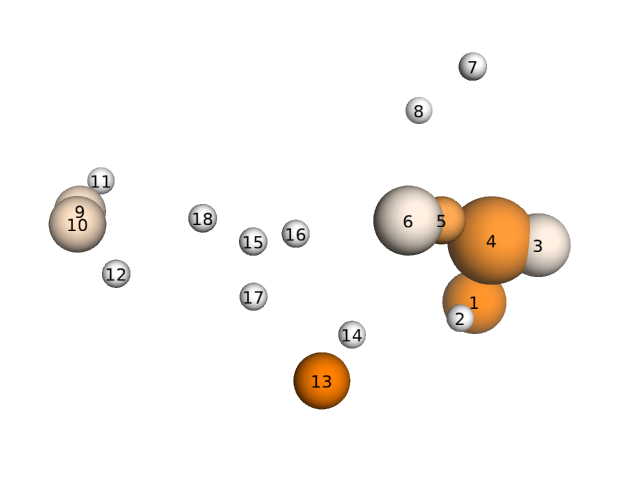

In [187]:
import pymol2
from IPython.display import Image

def Weighted_cluster_coloring(label_pos=[0,0,9], label_size=18, bg_color='white', visible_structure=False):
    with pymol2.PyMOL() as pymol:
        cmd = pymol.cmd
        cmd.load('../Results/pharmacophores/cluster_2/consensus/HydrogenAcceptor_clusters_by_weight.pse')
        
        cmd.load('../Data/target/AF-Q13705-ACVR2B_-_prepared.pdb', 'receptor')
        if visible_structure:
            cmd.show('cartoon', 'receptor')
        else:
            cmd.hide('everything', 'receptor')
        
        cmd.set('cartoon_transparency', 0.7)
        cmd.set('cartoon_color', 'lightpink')

        cmd.set('specular', 0)
        cmd.set('ray_shadows', 0)
        cmd.orient('HydrogenAcceptor')
        cmd.set('label_size', label_size)
        cmd.set('label_position', label_pos)
        cmd.bg_color(bg_color)
        

        img_path = "/tmp/pymol_out.png"
        cmd.png(img_path, ray=1)
        return Image(img_path)

# Example call
Weighted_cluster_coloring(label_pos=[0, 0, 5], label_size=17, bg_color='white', visible_structure=False)
